In [ ]:
!pip install kaggle


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mohit3430/haze1k

 99% 945M/953M [00:10<00:00, 139MB/s]
100% 953M/953M [00:10<00:00, 94.9MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/haze1k.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os#it lets the user interact with native os python in current running on!
import numpy as np#perform wide variety of mathmatical operation on arrays
import matplotlib.pyplot as plt#Create static 2d plots
import matplotlib.image as mpimg#Read images from drive/local path
import cv2 #image processing and all task related to images to identify objects faces,or handwriting of HUMAN
from google.colab.patches import cv2_imshow#imshow cretes a new window and display that image in the window
from PIL import Image
#Image module produces working with images such as saving,resizing and rotating images
#PIL support for opening,manipulating and saving many different image file formats
from sklearn.model_selection import train_test_split
#Splits array into random train and test subsets

In [ ]:
#os.name() This function provides the name of the operating system module that it imports.
with_mask_files = os.listdir('/content/Distributed_haze1k/test_moderate/input')
print(with_mask_files[0:5])#First five elements
print(with_mask_files[-5:])#First five lements of columns

['024.png', '014.png', '029.png', '044.png', '035.png']
['023.png', '010.png', '030.png', '019.png', '020.png']


In [ ]:
without_mask_files = os.listdir('/content/Distributed_haze1k/test_moderate/target')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['024.png', '014.png', '029.png', '044.png', '035.png']
['023.png', '010.png', '030.png', '019.png', '020.png']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 45
Number of without mask images: 45


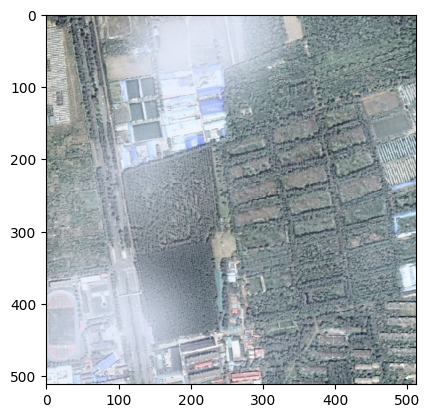

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/Distributed_haze1k/test_moderate/input/018.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/Distributed_haze1k/test_moderate/input/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((64,64))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/Distributed_haze1k/test_moderate/target/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((64,64))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)


list

In [ ]:
len(data)

90

array([[[110, 117, 110],
        [112, 120, 112],
        [116, 126, 118],
        ...,
        [174, 176, 179],
        [174, 175, 176],
        [180, 181, 180]],

       [[117, 123, 117],
        [116, 123, 116],
        [126, 133, 126],
        ...,
        [177, 182, 187],
        [175, 179, 183],
        [174, 178, 181]],

       [[117, 126, 120],
        [118, 126, 121],
        [120, 129, 125],
        ...,
        [178, 184, 190],
        [171, 176, 181],
        [167, 172, 176]],

       ...,

       [[191, 193, 196],
        [162, 170, 175],
        [157, 167, 173],
        ...,
        [185, 193, 193],
        [177, 183, 183],
        [163, 171, 172]],

       [[190, 195, 198],
        [162, 171, 177],
        [161, 170, 176],
        ...,
        [168, 178, 179],
        [167, 176, 177],
        [176, 185, 185]],

       [[170, 181, 183],
        [149, 159, 167],
        [158, 168, 175],
        ...,
        [198, 203, 205],
        [200, 201, 204],
        [207, 210, 206]]], dtype=uint8)
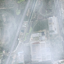

In [ ]:
data[0]

In [ ]:
data[0].shape

(64, 64, 3)

In [ ]:
with_mask_labels = [1]*45

without_mask_labels = [0]*45
labels = with_mask_labels + without_mask_labels
X = np.array(data)
Y = np.array(labels)


In [ ]:
print(X.shape)
print(Y.shape)

(90, 64, 64, 3)
(90,)


In [ ]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(90, 64, 64, 3) (72, 64, 64, 3) (18, 64, 64, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[136, 143, 138],
        [139, 145, 141],
        [145, 149, 149],
        ...,
        [237, 230, 225],
        [235, 227, 220],
        [236, 227, 219]],

       [[132, 144, 141],
        [138, 145, 144],
        [146, 152, 154],
        ...,
        [235, 230, 227],
        [236, 230, 227],
        [237, 230, 225]],

       [[139, 150, 151],
        [145, 151, 153],
        [149, 154, 158],
        ...,
        [236, 234, 233],
        [238, 234, 231],
        [238, 233, 229]],

       ...,

       [[195, 202, 213],
        [195, 203, 214],
        [198, 206, 219],
        ...,
        [174, 183, 198],
        [169, 178, 193],
        [164, 173, 188]],

       [[204, 209, 220],
        [203, 209, 221],
        [207, 214, 226],
        ...,
        [169, 178, 193],
        [163, 174, 188],
        [157, 168, 182]],

       [[190, 197, 207],
        [194, 203, 214],
        [219, 227, 239],
        ...,
        [164, 173, 188],
        [158, 170, 184],
        [150, 162, 176]]], dtype=uint8)
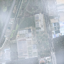

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.53333333, 0.56078431, 0.54117647],
        [0.54509804, 0.56862745, 0.55294118],
        [0.56862745, 0.58431373, 0.58431373],
        ...,
        [0.92941176, 0.90196078, 0.88235294],
        [0.92156863, 0.89019608, 0.8627451 ],
        [0.9254902 , 0.89019608, 0.85882353]],

       [[0.51764706, 0.56470588, 0.55294118],
        [0.54117647, 0.56862745, 0.56470588],
        [0.57254902, 0.59607843, 0.60392157],
        ...,
        [0.92156863, 0.90196078, 0.89019608],
        [0.9254902 , 0.90196078, 0.89019608],
        [0.92941176, 0.90196078, 0.88235294]],

       [[0.54509804, 0.58823529, 0.59215686],
        [0.56862745, 0.59215686, 0.6       ],
        [0.58431373, 0.60392157, 0.61960784],
        ...,
        [0.9254902 , 0.91764706, 0.91372549],
        [0.93333333, 0.91764706, 0.90588235],
        [0.93333333, 0.91372549, 0.89803922]],

       ...,

       [[0.76470588, 0.79215686, 0.83529412],
        [0.76470588, 0.79607843, 0.83921569],
        [0.77647059, 0

In [ ]:
import tensorflow as tf# data automation, model tracking, performance monitoring, and model retraining
#Tensors are n-dimensional vectors or matrices that represent all forms of data.
from tensorflow import keras
#Keras is a high-level neural networks API that simplifies the process of building and
#training deep learning models.

In [ ]:
num_of_classes = 2

model = keras.Sequential()
# keras.Sequential():----allows you to create models layer-by-layer for most problems

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)
#validation_split=0.1:-->an essential test for testing the efficiency of a machine learning mode

Epoch 1/5
2/2 [==============================] - 2s 395ms/step - loss: 0.8662 - acc: 0.4844 - val_loss: 0.7473 - val_acc: 0.3750
Epoch 2/5
2/2 [==============================] - 0s 189ms/step - loss: 0.8745 - acc: 0.4375 - val_loss: 0.6762 - val_acc: 0.6250
Epoch 3/5
2/2 [==============================] - 0s 188ms/step - loss: 0.6698 - acc: 0.6406 - val_loss: 0.6957 - val_acc: 0.3750
Epoch 4/5
2/2 [==============================] - 0s 179ms/step - loss: 0.6843 - acc: 0.5469 - val_loss: 0.7006 - val_acc: 0.3750
Epoch 5/5
2/2 [==============================] - 0s 175ms/step - loss: 0.7002 - acc: 0.5000 - val_loss: 0.6867 - val_acc: 0.3750


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

1/1 [==============================] - 0s 46ms/step - loss: 0.6858 - acc: 0.4444
Test Accuracy = 0.4444444477558136


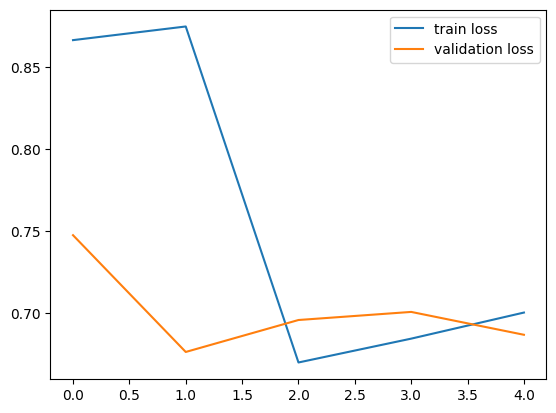

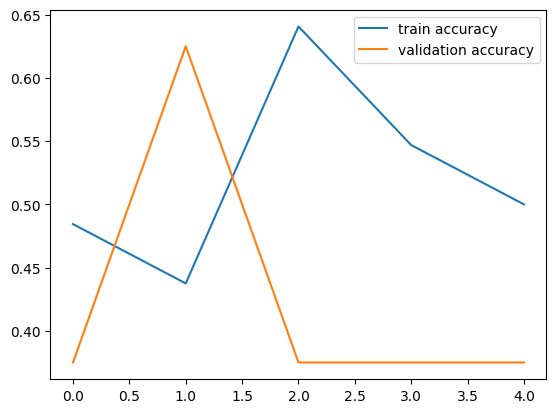

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

The gaussian variable represents the Gaussian blur filter. It is also a 3x3 numpy array that defines the weights for the convolution operation. The values in the array determine the contribution of each pixel to the blurred result....
The sharpen variable represents the sharpening filter. It is a 3x3 numpy array that defines the weights to be applied to each pixel during the filtering process.
The values in the array determine the emphasis given to the neighboring pixels....
The gaussian variable represents the Gaussian blur filter. It is also a 3x3 numpy array that defines the weights for the convolution operation. The values in the array determine the contribution of each pixel to the blurred result.
----The code above creates a figure with two subplots to display the sharpening and Gaussian blur filters. The imshow function is used to visualize the filters as grayscale images. The set_title function sets the titles for each subplot. Finally, the [axi.set_axis_off() for axi in ax.ravel()] line removes the axis labels and ticks from the subplots for a cleaner presentation.

Image Sharpening
Image sharpening is achieved by enhancing the high-frequency components of an image, which correspond to the edges and details. The sharpening process involves subtracting a blurred version of the image from the original image. This enhances the contrast along the edges, making them appear sharper.

Gaussian Blur
Gaussian blur is a popular smoothing technique that applies a weighted average to the pixels in an image. It uses a Gaussian kernel, which is a matrix of weights that determines the contribution of each pixel to the blurred result. The weights are higher at the center of the kernel and decrease towards the edges, creating a bell-shaped distribution.
Then, we create subplots using plt.subplots() to display the sharpened and blurred images side by side. The figsize parameter determines the size of the figure.
To display the sharpened image, we use ax[0].imshow() and set the colormap to grayscale using cmap='gray'. We also set the title of the subplot using ax[0].set_title().

Similarly, we display the Gaussian blurred image using ax[1].imshow() and set the title accordingly.
 Finally, we turn off the axis labels for a cleaner visualization using [axi.set_axis_off() for axi in ax.ravel()].

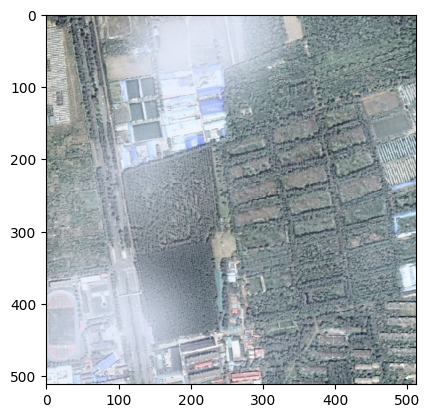

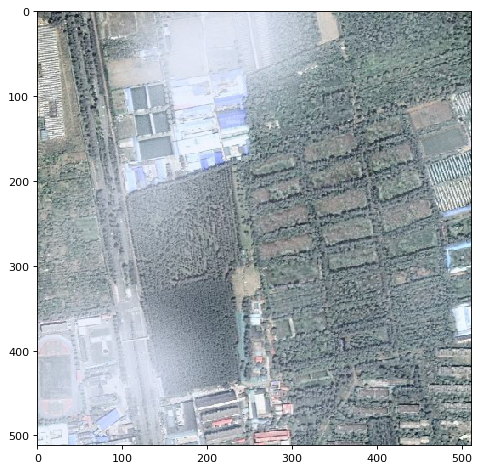

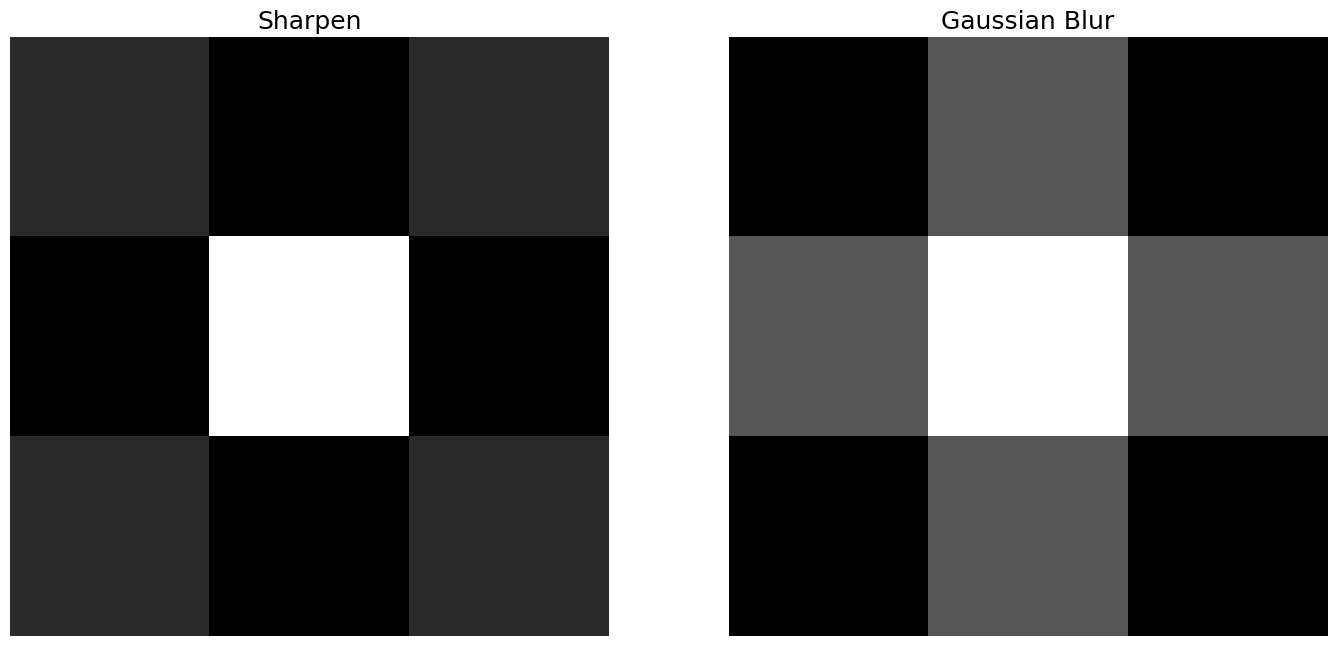

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

img = mpimg.imread('/content/Distributed_haze1k/test_moderate/input/018.png')
imgplot = plt.imshow(img)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(img);
plt.show()

# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

# Gaussian Blur
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
fig, ax = plt.subplots(1,2, figsize = (17,10))
ax[0].imshow(sharpen, cmap='gray')
ax[0].set_title(f'Sharpen', fontsize = 18)

ax[1].imshow(gaussian, cmap='gray')
ax[1].set_title(f'Gaussian Blur', fontsize = 18)

[axi.set_axis_off() for axi in ax.ravel()];
#Code explainer(https://www.figstack.com/app/explain)

Code Structure
The code provided demonstrates how to convert an RGB image to grayscale using Python. Here's the breakdown of the code structure:

Importing Libraries: We start by importing the necessary libraries. In this case, we need the rgb2gray function from the skimage.color module and the imshow function from the matplotlib.pyplot module.

Converting to Grayscale: The rgb2gray function takes an RGB image as input and returns the corresponding grayscale image. We pass the img variable, which represents the RGB image, to this function and store the grayscale image in the img_grey variable.

Displaying the Grayscale Image: We use the imshow function to display the grayscale image. The figure function is used to create a new figure window, and the imshow function displays the image in that window. We set the figure size to (8, 6) inches and the dpi (dots per inch) to 80.

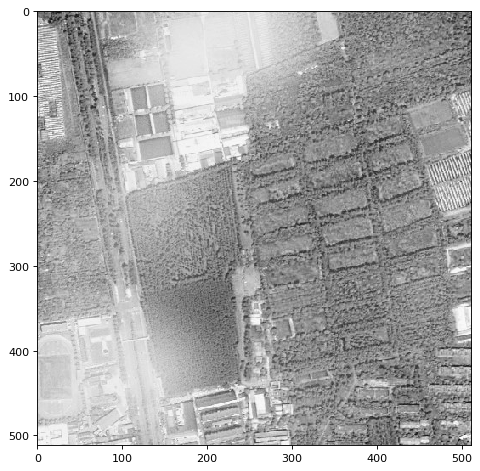

In [ ]:
img_grey = rgb2gray(img)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(img_grey);

Key Concepts
Before diving into the code, let's understand some key concepts related to image convolution:

Filter/Kernel: A filter or kernel is a small matrix of numbers that is applied to each pixel in the image. The values in the filter determine the weights of the neighboring pixels that contribute to the output value of the current pixel.

Convolution Operation: The convolution operation involves sliding the filter over the image and computing the weighted sum of the pixel values in the neighborhood defined by the filter. This process is repeated for each pixel in the image, resulting in a new convolved image.

Gaussian Filter: The Gaussian filter is a type of filter that applies a Gaussian distribution to the neighboring pixels. It is commonly used for blurring or smoothing an image. The Gaussian filter is characterized by its standard deviation, which determines the amount of blurring applied to the image.

In [ ]:

convolved_image = multi_convolver(img_grey, gaussian, 2)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(convolved_image);
#This code snippet convolves the grayscale image (img_grey) with the Gaussian filter (gaussian)
#for 2 iterations. It then displays the resulting convolved image.

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

<Figure size 640x480 with 0 Axes>

#Introduction#
Convolution is a fundamental operation in image processing that involves applying a filter or kernel to an image. It is widely used for tasks such as blurring, sharpening, edge detection, and noise reduction. In this article, we will explore the concept of convolution and its implementation in Python.

#Key Concepts#
Before diving into the code, let's understand some key concepts related to convolution:

Image: An image is a two-dimensional grid of pixels, where each pixel represents a specific color or intensity value.

Kernel: A kernel, also known as a filter or mask, is a small matrix used for convolution. It defines the weights and structure of the convolution operation.

Convolution Operation: The convolution operation involves sliding the kernel over the image and computing the dot product between the kernel and the corresponding pixels in the image. This process generates a new output image, which represents the filtered version of the original image.

Iterations: In some cases, multiple iterations of convolution may be performed to achieve the desired effect. Each iteration applies the convolution operation using a different kernel or with modified parameters.

#Code Structure#
The provided code demonstrates the implementation of a function called convolution_plotter. This function takes an image and a kernel as input and generates a plot showing the results of convolution at different iterations.

The code structure can be divided into the following sections:

Function Definition: The convolution_plotter function is defined, which takes two parameters: image and kernel.

Variable Initialization: The function initializes two variables: iterations and f_size. The iterations list contains the number of iterations to perform, and the f_size variable represents the font size for the plot titles.

Plot Initialization: The fig, ax = plt.subplots(1,4, figsize = (15,7)) line initializes a figure and four subplots for the plot.

Iteration Loop: The code then enters a loop that iterates over the subplots. For each iteration, it sets the title of the subplot based on the current iteration number.

Convolution and Plotting: Inside the loop, the multi_convolver function is called to perform the convolution operation using the current iteration number. The resulting image is then displayed in the subplot using ax.imshow.

Plot Customization: The ax.set_axis_off() line removes the axis labels and ticks from the subplots. Finally, fig.tight_layout() is called to adjust the spacing between the subplots.

NameError: name 'multi_convolver' is not defined

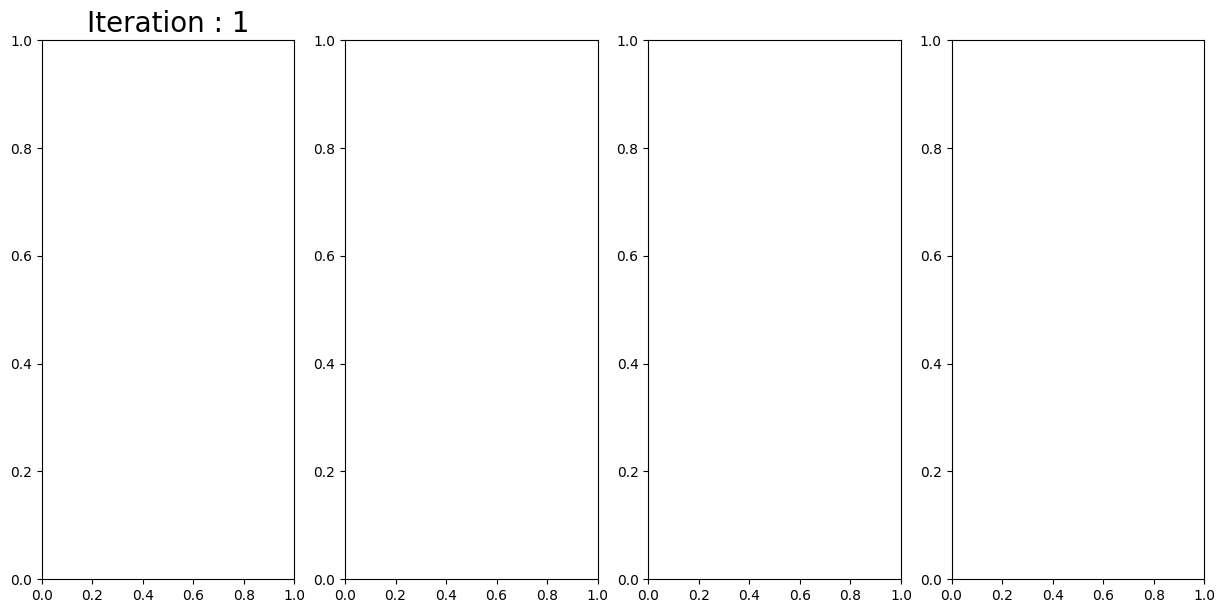

In [ ]:
def convolution_plotter(image, kernel):
    iterations = [1,10,20,30]
    f_size = 20

    fig, ax = plt.subplots(1,4, figsize = (15,7))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Iteration : {iterations[n]}', fontsize =f_size)
        ax.imshow(multi_convolver(image, kernel, iterations[n]),
                  cmap='gray')
        ax.set_axis_off()
    fig.tight_layout()

convolution_plotter(img_grey, gaussian)

In [ ]:
def convolver_rgb(image, kernel, iterations = 1):
    convolved_image_r = multi_convolver(image[:,:,0], kernel,
                                        iterations)
    convolved_image_g = multi_convolver(image[:,:,1], kernel,
                                        iterations)
    convolved_image_b  = multi_convolver(image[:,:,2], kernel,
                                         iterations)

    reformed_image = np.dstack((np.rint(abs(convolved_image_r)),
                                np.rint(abs(convolved_image_g)),
                                np.rint(abs(convolved_image_b)))) / 255



    fig, ax = plt.subplots(1,3, figsize = (17,10))

    ax[0].imshow(abs(convolved_image_r), cmap='Reds')
    ax[0].set_title(f'Red', fontsize = 15)

    ax[1].imshow(abs(convolved_image_g), cmap='Greens')
    ax[1].set_title(f'Green', fontsize = 15)

    ax[2].imshow(abs(convolved_image_b), cmap='Blues')
    ax[2].set_title(f'Blue', fontsize = 15)

    [axi.set_axis_off() for axi in ax.ravel()]

    return np.array(reformed_image).astype(np.uint8)
convolved_rgb_gauss = convolver_rgb(img, gaussian, 2)

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(convolved_rgb_gauss);

In [ ]:
convolved_rgb_sharpen = convolver_rgb(img, sharpen, 1)

In [ ]:
def convolver_rgb(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel,
                                     iterations)
    final_image = yuv2rgb(img_yuv)

    fig, ax = plt.subplots(1,2, figsize = (17,10))

    ax[0].imshow(image)
    ax[0].set_title(f'Original', fontsize = 20)

    ax[1].imshow(final_image);
    ax[1].set_title(f'YUV Adjusted, Iterations = {iterations}',
                    fontsize = 20)

    [axi.set_axis_off() for axi in ax.ravel()]

    fig.tight_layout()

    return final_image
final_image = convolver_rgb(img, sharpen, iterations = 1)

In [ ]:
def convolver_comparison(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel,
                      iterations)
    final_image_yuv = yuv2rgb(img_yuv)

    img_hsv = rgb2hsv(image)
    img_hsv[:,:,2] = multi_convolver(img_hsv[:,:,2], kernel,
                      iterations)
    final_image_hsv = hsv2rgb(img_hsv)



    convolved_image_r = multi_convolver(image[:,:,0], kernel,
                         iterations)
    convolved_image_g = multi_convolver(image[:,:,1], kernel,
                         iterations)
    convolved_image_b  = multi_convolver(image[:,:,2], kernel,
                         iterations)

    final_image_rgb = np.dstack((np.rint(abs(convolved_image_r)),
                                 np.rint(abs(convolved_image_g)),
                                 np.rint(abs(convolved_image_b)))) / 255

    fig, ax = plt.subplots(2,2, figsize = (5,5))

    ax[0][0].imshow(image)
    ax[0][0].set_title(f'Original', fontsize = 10)

    ax[0][1].imshow(final_image_rgb);
    ax[0][1].set_title(f'RGB Adjusted, Iterations = {iterations}',
                       fontsize = 10)
    fig.tight_layout()

    ax[1][0].imshow(final_image_yuv)
    ax[1][0].set_title(f'YUV Adjusted, Iterations = {iterations}',
                       fontsize = 10)

    ax[1][1].imshow(final_image_hsv)
    ax[1][1].set_title(f'HSV Adjusted, Iterations = {iterations}',
                       fontsize = 10)

    [axi.set_axis_off() for axi in ax.ravel()]

    fig.tight_layout()
convolver_comparison(img, sharpen, iterations = 1)

[Source](https://towardsdatascience.com/image-processing-with-python-blurring-and-sharpening-for-beginners-3bcebec0583a)